# Libraries

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.tree

# Read data

In [25]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 2 - Regression/Section 8 - Decision Tree Regression/'

In [26]:
df=pd.read_csv(work_dir+'Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


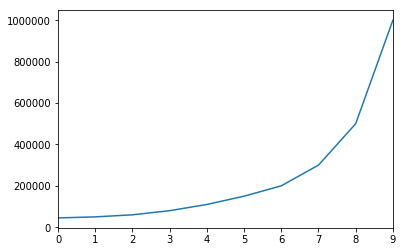

In [6]:
df['Salary'].plot()

In [7]:
X=df.as_matrix(['Level'])
Y=df['Salary'].values
X,Y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

# Clean up missing data

In [8]:
sum(np.isnan(X)),sum(np.isnan(Y))

(array([0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [16]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,3])
# X[:,3]=label_encoder.transform(X[:,3])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[3]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [18]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [16]:
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

# Train/test split

In [36]:
# X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,Y,test_size=0,random_state=0)
# Y_train.size,Y_test.size

In [37]:
# X_train,Y_train

In [38]:
# X_test,Y_test

# Regression - sklearn.tree.DecisionTreeRegressor()

In [9]:
dt_reg=sklearn.tree.DecisionTreeRegressor(random_state=0).fit(X,Y)
dt_reg.score(X,Y)

1.0

In [22]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta).reshape((num,1)))

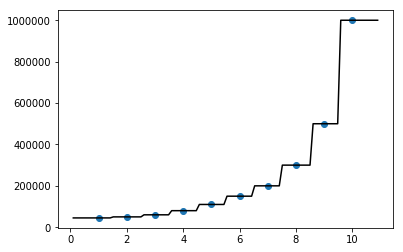

In [23]:
plt.scatter(X,Y)
X_plot=range_plot_X(X)
plt.plot(X_plot,dt_reg.predict(X_plot),color='black')